In [2]:
# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored.
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir);
# Load the WGCNA package
library(WGCNA)
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
# Allow multi-threading within WGCNA. This helps speed up certain calculations.
# At present this call is necessary for the code to work.
# Any error here may be ignored but you may want to update WGCNA if you see one.
# Caution: skip this line if you run RStudio or other third-party R environments.
# See note above.

#enableWGCNAThreads()

# Load the data saved in the first part
lnames = load(file = "WGCNA.dataInput.RData");
#The variable lnames contains the names of loaded variables.
lnames

[1] "/home/hanliu/project/mouse_rostral_brain/study/WGCNA"

[1] "datExpr"

pickSoftThreshold: will use block size 548.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 548 of 548


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.355 -1.600          0.946 39.7000  3.84e+01  81.10
2      2    0.472 -0.904          0.943  8.6300  7.76e+00  23.80
3      3    0.885 -0.957          0.940  3.3900  2.51e+00  11.60
4      4    0.944 -1.120          0.930  1.7400  1.01e+00   7.90
5      5    0.943 -1.220          0.927  1.0400  4.69e-01   6.40
6      6    0.966 -1.220          0.956  0.7030  2.34e-01   5.43
7      7    0.894 -1.230          0.864  0.5120  1.16e-01   4.73
8      8    0.954 -1.200          0.941  0.3950  6.47e-02   4.33
9      9    0.926 -1.190          0.906  0.3170  3.70e-02   4.04
10    10    0.891 -1.200          0.865  0.2630  2.04e-02   3.80
11    12    0.913 -1.180          0.889  0.1930  7.48e-03   3.41
12    14    0.936 -1.150          0.920  0.1500  2.72e-03   3.11
13    16    0.891 -1.150          0.860  0.1220  9.69e-04   2.87
14    18    0.264 -1.900          0.141  0.1010  3.46e-04   2.66
15    20    0.264 -1.840 

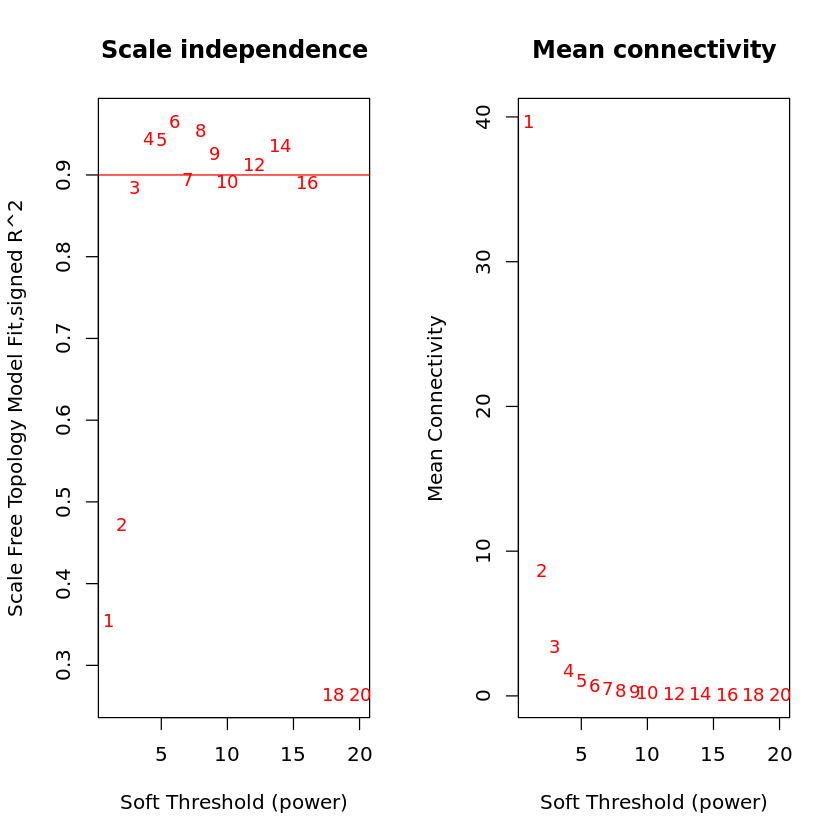

In [3]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
# sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [4]:
net = blockwiseModules(datExpr, power = 3,
TOMType = "signed", minModuleSize = 30,
reassignThreshold = 0, mergeCutHeight = 0.25,
numericLabels = TRUE, pamRespectsDendro = FALSE,
saveTOMs = TRUE,
saveTOMFileBase = "WGCNA.TOM",
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file WGCNA.TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 39 genes from module 1 because their KME is too low.
     ..removing 29 genes from module 2 because their KME is too low.
     ..removing 39 genes from module 3 because their KME is too low.
     ..removing 21 genes from module 4 because their KME is too low.
     ..removing 21 genes from module 5 because their KME is too low.
     ..removing 11 genes from module 6 because their KME is too low.
 ..merging modules that are too close..
     

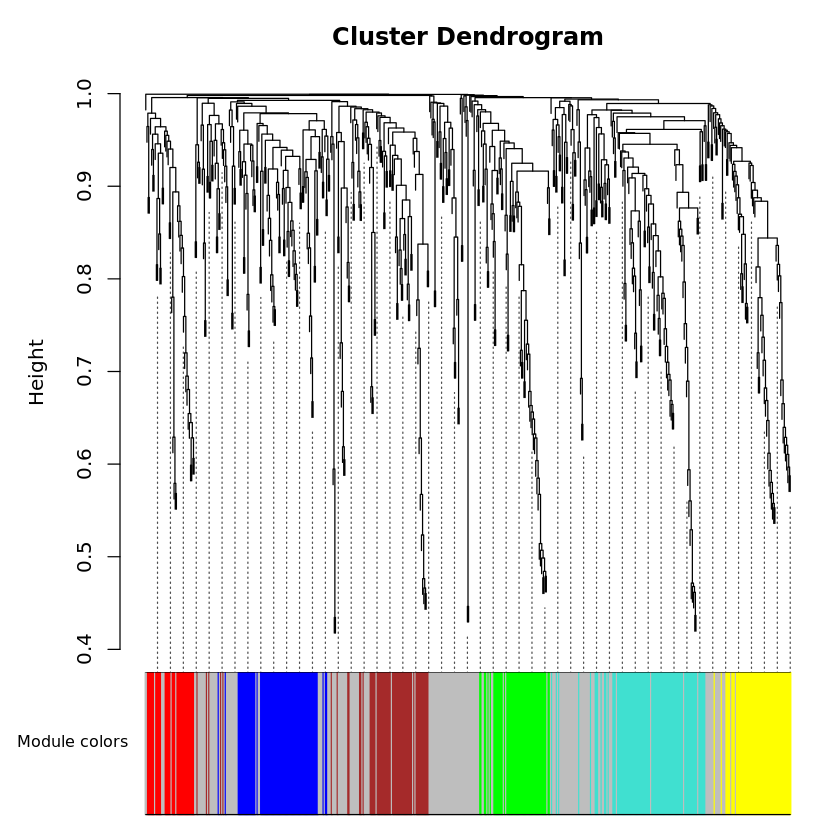

In [5]:
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [6]:
moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs;
geneTree = net$dendrograms[[1]];
save(MEs, moduleLabels, moduleColors, geneTree,
file = "WGCNA-networkConstruction-auto.RData")

In [7]:
write.csv(moduleLabels, 'gene_module.csv')